In [1]:
#import networkx as nx
#import pandas as pd
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


In [2]:
def V(num):
    return 4*num+1

def S(num):
    return 2*num+1

def fG(num):
    return 2*num-1

def ruleTwo(num):
        result = (num-1)/2
        r = 0
        k = 0

        while result % 2 != 0:
            result = (result-1)/2
            k+=1

        r = result/2

        if ((k) % 2 == 0 and r % 2 == 0) or ((k) % 2 != 0 and r % 2 != 0):
            return (True)
        else:
            return (False)

def isIncluded(numberArr, number):
    # for i in arr:
    #     if i == num:
    #         return True
        
    # return False
    if len(numberArr) > 0:
        numberArr.sort()
        
        left = int(0)
        right = int(len(numberArr)-1)
        i = int(0)
        
        
        while left <= right:
            
            i = int((left + right)/2)
            if numberArr[i] == number:
                return True
            
            elif numberArr[i] < number:
                left = i+1
            else:
                right = i-1
        
            
        if numberArr[i] == number:
            return True
        else:
            return False
    else:
        return False

def getType(label):
    if (label + 1) % 3 == 0:
        return 1
    elif label % 3 == 0:
        return 2
    elif (label - 1) % 3 == 0:
        return 3
    return -1

arrInfo = []
rowStartLabel = []
saveArrInfo = []

def setStartArr(n):
    for i in range(0,n):
        if i == 0:
            arrInfo.append(0)
            saveArrInfo.append(0)
            rowStartLabel.append(1)
        elif i == 1:
            arrInfo.append(0)
            saveArrInfo.append(0)
            rowStartLabel.append(3)
        elif i == 2:
            arrInfo.append(1)
            saveArrInfo.append(1)
            rowStartLabel.append(5)
        else:
            arrInfo.append(2**(i-1))
            saveArrInfo.append(2**(i-1))
            rowStartLabel.append(2**i + 1)

    return arrInfo, saveArrInfo, rowStartLabel


def numbersAbove(arrOne, arrTwo, row):
    count = 0
    
    for i in range(row, len(arrOne)):
        count += (arrOne[i]-arrTwo[i])

    return count

def getCounter(rowStartLabel, value):
    
    counter = 0
    
    for start in rowStartLabel:
        if counter != len(rowStartLabel):
            if value < rowStartLabel[counter]:
                break
            else:
                counter = counter + 1
        elif counter == len(rowStartLabel):
            break

    return counter


3: 9
[0, 0, 0, 2, 5, 13, 31, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
4: 8
[0, 0, 0, 0, 4, 13, 31, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
5: 519
[0, 0, 0, 0, 0, 1, 4, 15, 43, 140, 387, 924, 2047, 4096, 8192]
6: 505
[0, 0, 0, 0, 0, 0, 3, 15, 43, 140, 387, 924, 2047, 4096, 8192]
7: 1002
[0, 0, 0, 0, 0, 0, 0, 3, 9, 59, 245, 793, 1921, 4096, 8192]
8: 944
[0, 0, 0, 0, 0, 0, 0, 0, 7, 58, 245, 793, 1921, 4096, 8192]
9: 7238
[0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 30, 135, 543, 1966, 6209]
[9, -1, 511, -14, 497, -58, 6294]

expenses of the compleded rows starting with row 3
[9, 8, 519, 505, 1002, 944, 7238]

total expense


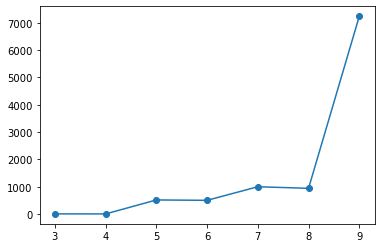


log(expense)


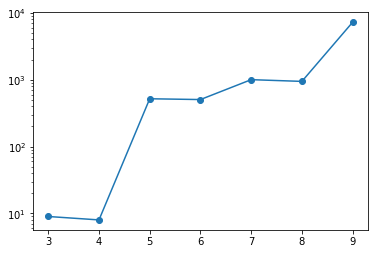


difference


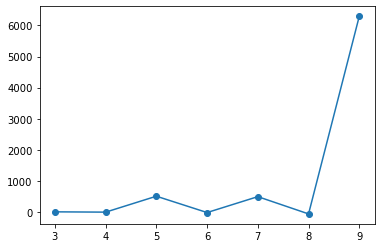

In [3]:
# Change n to choose Size of Tree

n=20

expenses = []
rows = []
big_leaf = (2**n)-1
used = []
proven = []
proven.append(3)
proven.append(5)
arrInfo = []
rowStartLabel = []
saveArrInfo = []
arrInfo, saveArrInfo, rowStartLabel = setStartArr(n)
counter = 0

while len(proven) > 0:
    proven.sort()
    #print(proven)
    for i in proven:   
        if isIncluded(used, i) == False:       
            
            # RULE 1 : if x is orange V(x) becomes orange 
            if V(i) <= big_leaf + 1:                
                value1 = V(i)
                counter = 0
                
                if isIncluded(used, value1) == False:
                    proven.append(V(i))                 
                    counter = getCounter(rowStartLabel, value1)
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
            r2 = ruleTwo(i)
            if r2: 
                if S(i) <= big_leaf + 1:
                    value2 = S(i)
                    counter = 0
                    
                    if isIncluded(used, value2) == False:
                        proven.append(S(i))
                        counter = getCounter(rowStartLabel, value2)
                        arrInfo[counter-1] -= 1

                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 3 : if x is orange and of type C then (4x-1)/3 becomes orange
            if getType(i) == 3:             
                value3 = int((4*i-1)/3)
                counter = 0
                
                if value3 <= big_leaf + 1:  
                    if isIncluded(used, value3) == False:
                        proven.append(value3)
                        counter = getCounter(rowStartLabel, value3)                     
                        arrInfo[counter-1] -= 1
                        
                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

            # # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange                   
            if getType(i) == 1:                       
                value4 = int(fG(i)/3)                                     
                
                if isIncluded(used, value4) == False:   
                    proven.append(value4)
                    #print(value4)
                    counter = 0 
                    counter = getCounter(rowStartLabel, value4)               
                    arrInfo[counter-1] -= 1
                    
                    if arrInfo[counter-1] == 0:
                        expense = numbersAbove(saveArrInfo, arrInfo, counter)
                        expenses.append(expense)
                        rows.append(counter)
                        print("{0}: {1}".format(counter, expense))
                        print("{0}".format(arrInfo))

            proven.remove(i)
            used.append(i)
            break
        else:
            proven.remove(i)

dif = []
for i in range(0,len(expenses)):
    if i == 0:
        dif.append(expenses[i])
    else:
        dif.append(expenses[i] - expenses[i-1])

print()
print("expenses of the compleded rows starting with row 3")
print(expenses)
print()
print("total expense")
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
print()
print("log(expense)")
plt.yscale('log')
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.show()
print()
print("difference")
plt.plot(rows, dif, marker = 'o', linestyle = 'solid')
plt.show()


